In [1]:
%pylab inline
import urllib

Populating the interactive namespace from numpy and matplotlib


# Loading dataset

In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
with urllib.request.urlopen(url) as response:
    raw_data = response.readlines()
data = np.array([list(map(int, line.split())) for line in raw_data])
X = data[:,:-1]
y = data[:,-1]

# Visualizing first decisions

In [8]:
import sklearn.tree as tree
import graphviz

In [9]:
clf = tree.DecisionTreeClassifier(max_depth=2)

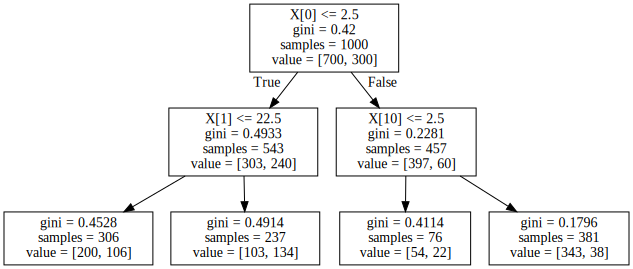

In [11]:
graphviz.Source(tree.export_graphviz(clf.fit(X, y), out_file=None))

According to dataset description the first decision is to separate customers with status of existing checking account < 200 DM.

Then the first group is splitted by duration in month < 23. The second group is splitted by the existance of other installment plans.

# Relation between cross_val_score and tree depth

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [27]:
def calc_scores(depth):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X, y)
    clf.fit(X, y)
    train_score = accuracy_score(clf.predict(X), y)
    return [sum(scores) / len(scores), train_score]

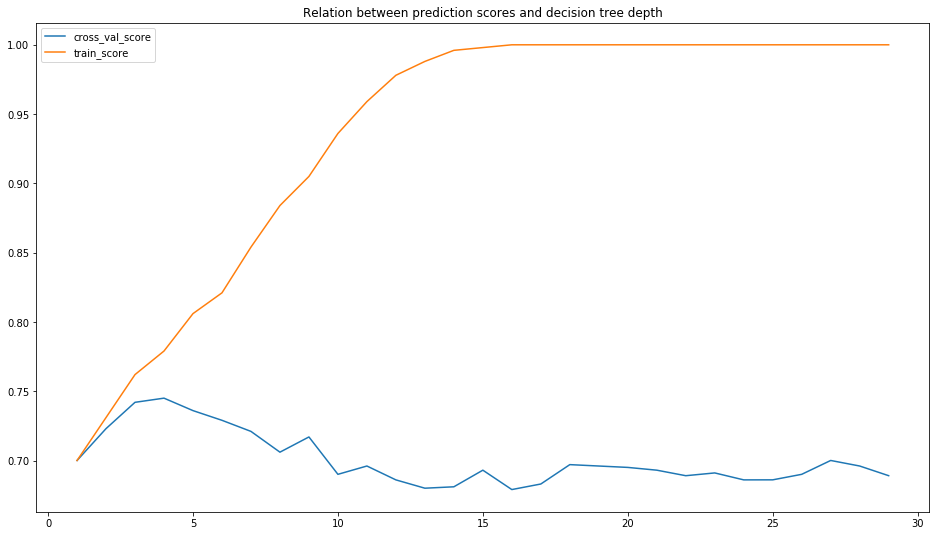

best cross_val_score with depth 4


In [38]:
grid = np.arange(1, 30)
scores = np.array([calc_scores(x) for x in grid])
plt.figure(figsize=(16, 9))
plt.title("Relation between prediction scores and decision tree depth")
plt.plot(grid, scores[:,0], label="cross_val_score")
plt.plot(grid, scores[:,1], label="train_score")
plt.legend()
plt.show()
print("best cross_val_score with depth", np.argmax(scores[:,0] + 1) + 1)